In [4]:
import numpy as np
import mne
from mne.preprocessing import ICA
import sklearn
import matplotlib.pyplot as plt
from mne.preprocessing import annotate_muscle_zscore

In [66]:
# 분석대상 이름 입력
name = input("분석대상 이름을 입력하세요.")
print(f"분석대상 이름은 {name}입니다.")

# 분석 목적 입력
purpose = input("분석 목적을 입력하세요. load와 append 중 입력하세요.")
print(f"분석 목적은 {purpose}입니다.")

# load 선택 시
if purpose == 'load':
    print("load를 선택하였습니다.")
    # Specify the full path to EEG data file (EDF format)
    eeg_file_path = rf'H:\Mg_EEG\edf_files\{name}_7200.EDF'
    
    # Load EEG data
    eeg_data = mne.io.read_raw_edf(eeg_file_path, preload=True)
    print(f"성공적으로 데이터를 불러왔습니다.")

# append 선택 시
elif purpose == 'append':
    print("append를 선택하였습니다.")
    # Specify the full path to EEG data file (EDF format)
    eeg_file_path_before = rf'H:\Mg_EEG\edf_files\{name}_before_3600.EDF'
    eeg_file_path_after = rf'H:\Mg_EEG\edf_files\{name}_after_3600.EDF'
    
    # Load EEG data
    eeg_data_before = mne.io.read_raw_edf(eeg_file_path_before, preload=True)
    eeg_data_after = mne.io.read_raw_edf(eeg_file_path_after, preload=True)
    print(f"성공적으로 데이터를 불러왔습니다.")

    # 3600초 이상의 데이터는 3600초로 자르기
    for data in [eeg_data_before, eeg_data_after]:
        if len(data) > 3600*200:
            data.crop(tmax=3600, include_tmax=False)
            print(f"{data.filenames[0]}: 데이터 길이가 3600초 이상이므로 3600초로 자름.")
        else:
            print(f"{data.filenames[0]}:데이터 길이가 3600초 미만이므로 그대로 사용.")
    
    # 데이터 합치기
    eeg_data = eeg_data_before.copy()
    eeg_data.append(eeg_data_after)
    if len(eeg_data) == 7200*200:
        print("데이터가 성공적으로 합쳐졌습니다.")
    else:
        print("문제가 발생하였습니다. 확인 바랍니다.")
else:
    print("올바른 값을 입력하세요.")


분석대상 이름은 이귀임입니다.
분석 목적은 append입니다.
append를 선택하였습니다.
Extracting EDF parameters from H:\Mg_EEG\edf_files\이귀임_before_3600.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 733599  =      0.000 ...  3667.995 secs...
Extracting EDF parameters from H:\Mg_EEG\edf_files\이귀임_after_3600.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 732199  =      0.000 ...  3660.995 secs...
성공적으로 데이터를 불러왔습니다.
H:\Mg_EEG\edf_files\이귀임_before_3600.EDF: 데이터 길이가 3600초 이상이므로 3600초로 자름.
H:\Mg_EEG\edf_files\이귀임_after_3600.EDF: 데이터 길이가 3600초 이상이므로 3600초로 자름.
데이터가 성공적으로 합쳐졌습니다.


In [67]:
%matplotlib qt
eeg_data.plot()
plt.show()

Channels marked as bad:
none


In [52]:
eeg_data.info

Measurement date,"October 01, 2016 06:54:00 GMT"
Experimenter,Unknown
Participant,No
Digitized points,Not available
Good channels,20 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


In [44]:
# Specify the time range of interest
start_time = 0  # Start time in seconds
duration = 7200 # 2 hours in seconds
end_time = start_time + duration # End time in seconds (2 hours later from start_time)
# Mark the time of magnesium infusion
time_of_infusion = 3600  # Time of infusion in seconds

In [45]:
# Crop EEG data
eeg_data_window = eeg_data.copy().crop(tmin=start_time, tmax=7199)

In [46]:
# Notch filter apply
eeg_data_window.notch_filter(freqs=[60])

Filtering raw data in 2 contiguous segments
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1321 samples (6.605 s)



Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Measurement date,"October 01, 2016 06:54:00 GMT"
Experimenter,Unknown
Participant,No
Digitized points,Not available
Good channels,20 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


In [47]:
print(eeg_data_window.ch_names)

['Fp1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'Fp1-F7', 'F7-T3', 'T3-T5', 'T5-O1', 'Fp2-F8', 'F8-T4', 'T4-T6', 'T6-O2', 'Fz-Cz', 'Cz-Pz', 'EKG1-EKG2', 'EOGL-A1']


In [48]:
eeg_data_trans = eeg_data_window.copy()

eeg_data_trans.drop_channels(eeg_data_window.ch_names[18:])

eeg_data_trans_ch_names = eeg_data_trans.ch_names

ch_names_answer = ['Fp1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 
                'Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 
                'Fp1-F7', 'F7-T3', 'T3-T5', 'T5-O1', 
                'Fp2-F8', 'F8-T4', 'T4-T6', 'T6-O2', 
                'Fz-Cz', 'Cz-Pz']

# 차이점을 저장할 딕셔너리 초기화
channel_mapping = {}

# 리스트 길이만큼 반복
for i in range(len(eeg_data_trans_ch_names)):
    if eeg_data_trans_ch_names[i] != ch_names_answer[i]:
        # 차이가 있는 경우, 해당 인덱스의 값을 딕셔너리에 저장
        channel_mapping[eeg_data_trans_ch_names[i]] = ch_names_answer[i]

# 결과 출력
print(channel_mapping)

{}


In [49]:
eeg_data_trans.rename_channels(channel_mapping)

Measurement date,"October 01, 2016 06:54:00 GMT"
Experimenter,Unknown
Participant,No
Digitized points,Not available
Good channels,18 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


In [50]:
# Step 1: Identify your current bipolar channels
# This is an example, adjust according to your actual channel names
bipolar_chs = ['Fp1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 
                'Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 
                'Fp1-F7', 'F7-T3', 'T3-T5', 'T5-O1', 
                'Fp2-F8', 'F8-T4', 'T4-T6', 'T6-O2', 
                'Fz-Cz', 'Cz-Pz']

# Step 2: Create a list of monopolar electrode names
monopolar_chs = ['Fp1', 'F3', 'C3', 'P3', 'O1',
                 'Fp2', 'F4', 'C4', 'P4', 'O2',
                 'F7', 'T3', 'T4', 'T5', 'T6', 'F8',
                 'Fz', 'Cz', 'Pz']

# Step 3: Create a transformation matrix
n_bipolar = len(bipolar_chs)
n_monopolar = len(monopolar_chs)
transform_mat = np.zeros((n_monopolar, n_bipolar))

for i, mono_ch in enumerate(monopolar_chs):
    for j, bi_ch in enumerate(bipolar_chs):
        if mono_ch in bi_ch.split('-'):
            if mono_ch == bi_ch.split('-')[0]:
                transform_mat[i, j] = 1
            else:
                transform_mat[i, j] = -1

# Step 4: Apply the transformation
data = eeg_data_trans.get_data()
monopolar_data = np.dot(transform_mat, data)

# Create a new Raw object with the monopolar data
info = mne.create_info(ch_names=monopolar_chs, sfreq=eeg_data_trans.info['sfreq'], ch_types='eeg')
eeg_data_monopolar = mne.io.RawArray(monopolar_data, info)

# Step 5: Set the new monopolar montage
montage = mne.channels.make_standard_montage('standard_1020')
eeg_data_monopolar.set_montage(montage)

# Now you have a new Raw object with monopolar data in the 10-20 system

Creating RawArray with float64 data, n_channels=19, n_times=1439801
    Range : 0 ... 1439800 =      0.000 ...  7199.000 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


In [56]:
#ecg_eog_data_window = eeg_data_window.get_data([18, 19, 20])
ecg_eog_data_window = eeg_data_window.get_data([18, 19])

new_info = mne.create_info(
    ch_names=['ECG', 'EOG1'],
    sfreq=eeg_data_window.info['sfreq'],
    ch_types=['ecg', 'eog']
)

ecg_eog_raw = mne.io.RawArray(ecg_eog_data_window, new_info)

eeg_data_monopolar.add_channels([ecg_eog_raw], force_update_info=True)

print(eeg_data_monopolar.ch_names)

Creating RawArray with float64 data, n_channels=2, n_times=1439801
    Range : 0 ... 1439800 =      0.000 ...  7199.000 secs
Ready.
['Fp1', 'F3', 'C3', 'P3', 'O1', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F7', 'T3', 'T4', 'T5', 'T6', 'F8', 'Fz', 'Cz', 'Pz', 'ECG', 'EOG1']


In [ ]:
eeg_data_monopolar.plot()

In [57]:
# Detecting artifact by ICA
ica = ICA(n_components=15, random_state=42)
ica.fit(eeg_data_monopolar)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


C:\Users\esin4\AppData\Local\Temp\ipykernel_9532\369674862.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(eeg_data_monopolar)


Selecting by number: 15 components
Fitting ICA took 21.9s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,40 iterations on raw data (1439801 samples)
ICA components,15
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


In [58]:
# ECG detecting
ecg_idx, ecg_scores = ica.find_bads_ecg(eeg_data_monopolar)
# EOG detecting
eog_idx, eog_scores = ica.find_bads_eog(eeg_data_monopolar)
# muscle detecting
muscle_idx, muscle_scores = ica.find_bads_muscle(eeg_data_monopolar)

artifact_idx = list(set(ecg_idx + eog_idx + muscle_idx))
#artifact_idx = list(set(eog_idx + muscle_idx))
#artifact_idx = list(set(muscle_idx))
eeg_data_clean = eeg_data_monopolar.copy()
ica.apply(eeg_data_clean, exclude=artifact_idx)

Using threshold: 0.36 for CTPS ECG detection
Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2000 samples (10.000 s)

Number of ECG events detected : 10958 (average pulse 91 / min.)
Not setting metadata
10958 matching events found
No baseline correction applied
Using data from preloaded Raw for 10958 events and 201 original time points ...
1 bad epochs dropped
Using EOG channel: EOG1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, ze

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"19 EEG, 1 ECG, 1 EOG"
Bad channels,None
EOG channels,EOG1
ECG channels,ECG
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


In [59]:
# Bandpass filters
eeg_data_clean.filter(l_freq=0.1, h_freq=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (33.005 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"19 EEG, 1 ECG, 1 EOG"
Bad channels,None
EOG channels,EOG1
ECG channels,ECG
Sampling frequency,200.00 Hz
Highpass,0.10 Hz
Lowpass,30.00 Hz


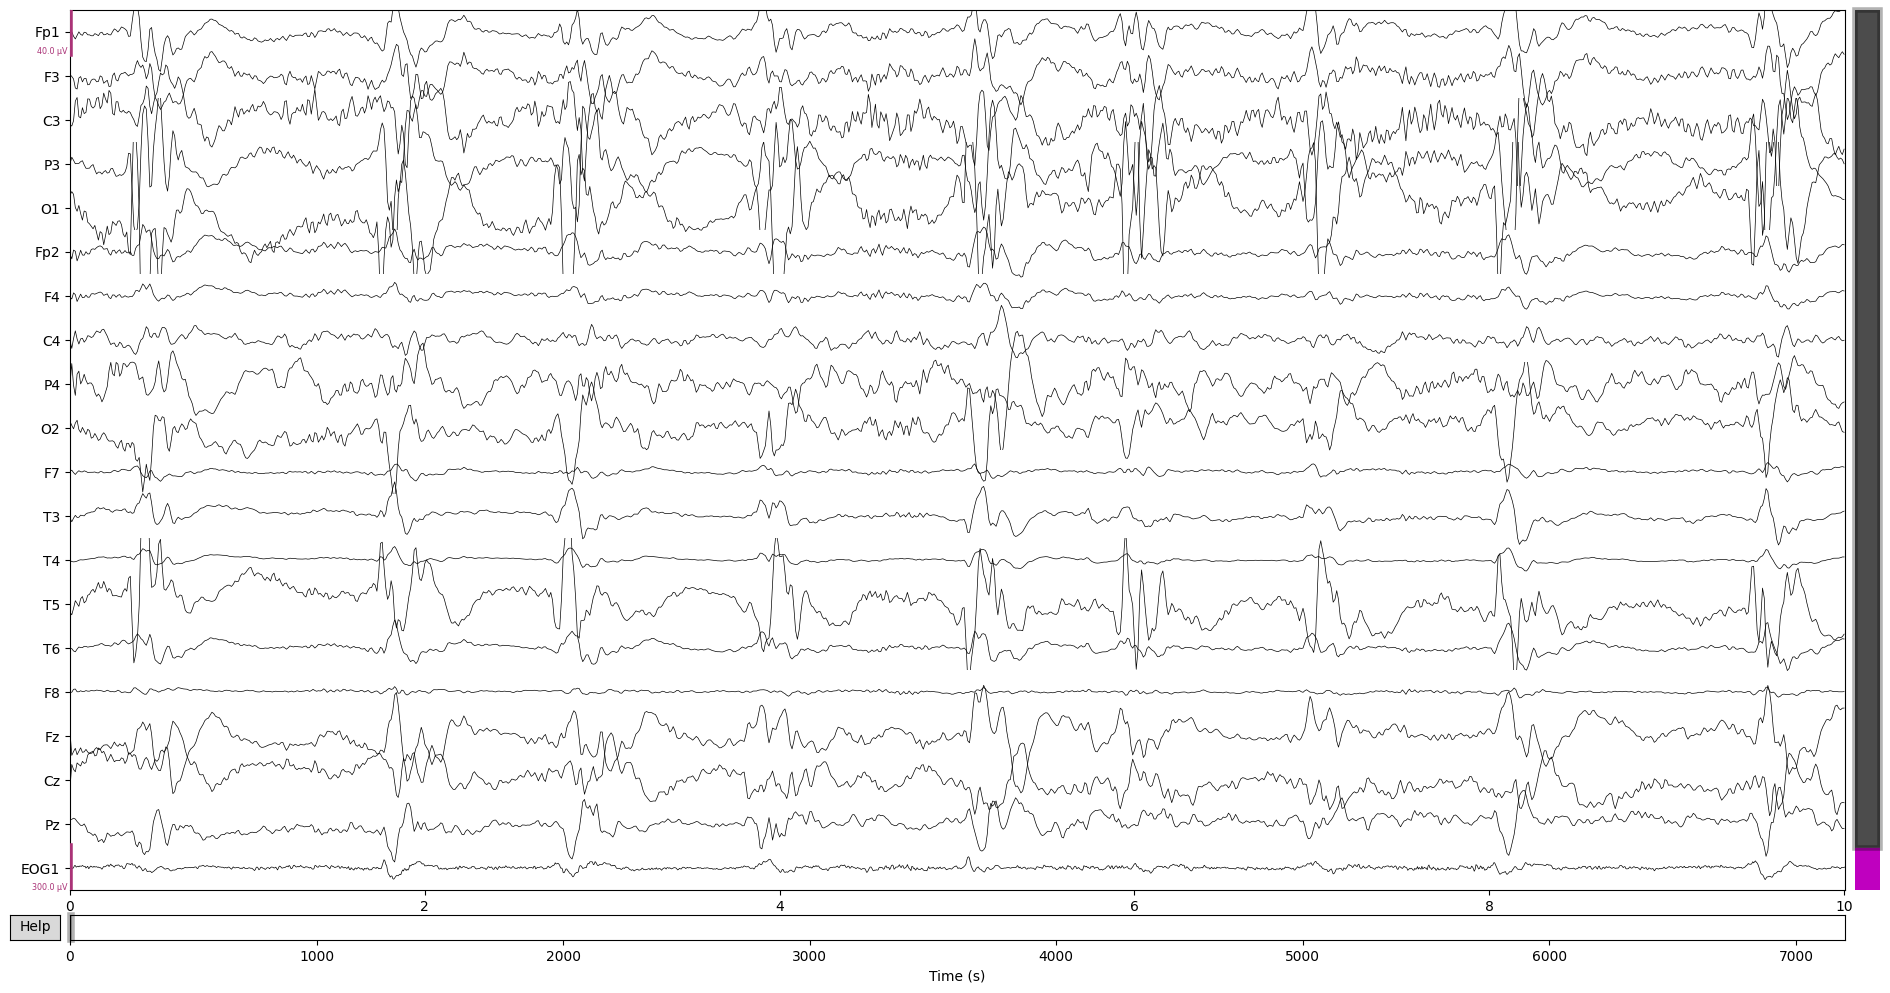

Channels marked as bad:
none


In [60]:
eeg_data_clean.plot()

In [61]:
eeg_data_clean.drop_channels(eeg_data_clean.ch_names[19:])

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.10 Hz
Lowpass,30.00 Hz


In [62]:
eeg_data_clean.save(rf'H:\Mg_EEG\edf_files\{name}_7200_clean.fif', overwrite=False)
#eeg_data_clean.save(rf'H:\Mg_EEG\edf_files\{name}_7200_clean.fif', overwrite=True) #overwrite 필요할 때만 시행

Writing H:\Mg_EEG\edf_files\정복연_7200_clean.fif


C:\Users\esin4\AppData\Local\Temp\ipykernel_9532\945132427.py:1: RuntimeWarning: This filename (H:\Mg_EEG\edf_files\정복연_7200_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_data_clean.save(rf'H:\Mg_EEG\edf_files\{name}_7200_clean.fif', overwrite=False)


Closing H:\Mg_EEG\edf_files\정복연_7200_clean.fif
[done]
